# Feature Engineering for text

## Text preprocessing

Oftentimes textual data contains a lot of noise and redundancies which can potentially decrease the performance of a machine learning model trained on these. Luckily there are quite a few approaches to filter out a lot of the unwanted text and leave us with the most significant features.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
s = "Hello there, this Is an Example sentence containing 9 words!"

In [3]:
def remove_punctuation(text):
    return re.sub("[.,!?:;-='...\"@#_]", "", text)

s_clean = remove_punctuation(s)

print(s)
print(s_clean)

Hello there, this Is an Example sentence containing 9 words!
Hello there this Is an Example sentence containing 9 words


In [4]:
def remove_numbers(text):
    return re.sub("\\d+", "", text)

s_clean = remove_numbers(s_clean)

print(s)
print(s_clean)

Hello there, this Is an Example sentence containing 9 words!
Hello there this Is an Example sentence containing  words


In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
print(stop_words)

{'yourselves', 'not', 'just', 'doesn', 'below', 've', 'above', 'down', 'further', 'their', 'more', 'and', 'here', 'him', 'while', 'have', 'your', 'so', 'whom', "it's", 'until', 'themselves', 'her', 'them', 't', 'we', 'those', 'herself', 'because', 'other', 'needn', 'isn', 'off', 'mightn', 'once', 'didn', 'most', 'a', 'll', 'for', 'up', 'when', 'has', 'again', "she's", "mustn't", 'who', 'm', 'such', "wasn't", 'shan', 'shouldn', 'be', 'was', "hadn't", 'had', 'these', 'ours', 'both', "shan't", 'with', "weren't", 'about', 'what', 'how', 'now', "you'd", 'y', 'against', 'between', 'mustn', "you've", "doesn't", 'or', 'which', 'ourselves', 'during', 'myself', "needn't", "you're", 'where', 'after', 're', 'were', 'each', 'itself', "don't", 'all', 'out', 'as', 'wouldn', 'at', 'ain', 'haven', 'is', 'o', "haven't", 'theirs', 'did', "you'll", 'hasn', "shouldn't", 'our', 'my', 'it', 'own', 'won', 'he', 'ma', 'through', 'on', "aren't", 'very', 'if', 'from', 'than', 'his', 'aren', 'hers', 'over', 'in',

[nltk_data] Downloading package stopwords to /home/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def remove_stopwords(text,stopwords):
    s_stop = [w for w in text.split() if w not in stop_words]
    return " ".join(s_stop)

def remove_stopwords_lower(text,stopwords):
    s_stop = [w for w in text.lower().split() if w not in stop_words]
    return " ".join(s_stop)

s_clean = remove_stopwords(s_clean,stop_words)
print(s)
print(s_clean)

s_clean = remove_stopwords_lower(s_clean,stop_words)
print(s_clean)

Hello there, this Is an Example sentence containing 9 words!
Hello Is Example sentence containing words
hello example sentence containing words


### Stemming / Text normalization

Textual data contains a lot of different variations of the same word, so when we are counting the occurences we are not getting the right results. To map the counts of all these slight variations to the same base word, different techniques can be applied. This whole process is called ___stemming___ as we try to reduce each word down to its word stem form. 

In [7]:
import nltk

stemmer = nltk.stem.porter.PorterStemmer()
stemmer.stem("currencies")

'currenc'

In [8]:
# Implement a function that uses stemming to bring down each word in a given text to its base form
# and then return the edited text.
# Use this function to further clean up the example text.

def stem_words_in_text(text,stemmer):
    stemmed_text = [stemmer.stem(w) for w in text.split()]
    return " ".join(stemmed_text)

s_clean_stemmer = stem_words_in_text(s_clean,stemmer)

print(s)
print(s_clean_stemmer)

Hello there, this Is an Example sentence containing 9 words!
hello exampl sentenc contain word


In [9]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("currencies")

[nltk_data] Downloading package wordnet to /home/dan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'currency'

In [10]:
# Implement a function that uses lemmatization to bring down each word in a given text to its base form and
# then return the edited text.
# Use this function to further clean up the example text.

def lemmatize_words_in_text(text,lemmatizer):
    lemmatized_text = [lemmatizer.lemmatize(w) for w in text.split()]
    return " ".join(lemmatized_text)

lemmatizer = WordNetLemmatizer()

s_clean_lemmatizer = lemmatize_words_in_text(s_clean,lemmatizer)
print(s_clean_lemmatizer)

hello example sentence containing word


## Bag-of-Words

In order to classify or analyze textual data, we first need to transform it into a numerical representation. One of the simplest approaches to do this is called ___Bag-of-Words___ and uses word count statistics, which oftentimes suffices for classification tasks or information retrieval. It creates features on the word-level, which are stored in a vector of counts, with an entry for every word extracted from the dataset.
and it is intuitive to t
<br><br>

![title](img/bow.png)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer to create bag-of-words feature vector
vectorizer = CountVectorizer(token_pattern="(?u)\\b\\w+\\b")

# applied to unprocessed text. The argument ([s]) has to be in brackets in this case as it is a single string
# and the function expects some sort of collection.
vectorizer.fit_transform([s])
print(vectorizer.vocabulary_)

# applied to processed text. The argument ([s_clean]) has to be in brackets in this case as it is a single string
# and the function expects some sort of collection.
vectorizer.fit_transform([s_clean])
print("\n{}".format(vectorizer.vocabulary_))

# get feature names (words) as np.array
feature_names = vectorizer.get_feature_names_out()
feature_names

{'hello': 4, 'there': 7, 'this': 8, 'is': 5, 'an': 1, 'example': 3, 'sentence': 6, 'containing': 2, '9': 0, 'words': 9}

{'hello': 2, 'example': 1, 'sentence': 3, 'containing': 0, 'words': 4}


array(['containing', 'example', 'hello', 'sentence', 'words'],
      dtype=object)

Sometimes it can be useful to create word clouds to get a better view of the word frequencies. You can combine this with filtering for certain classes to get the most frequent words for each possible classification.

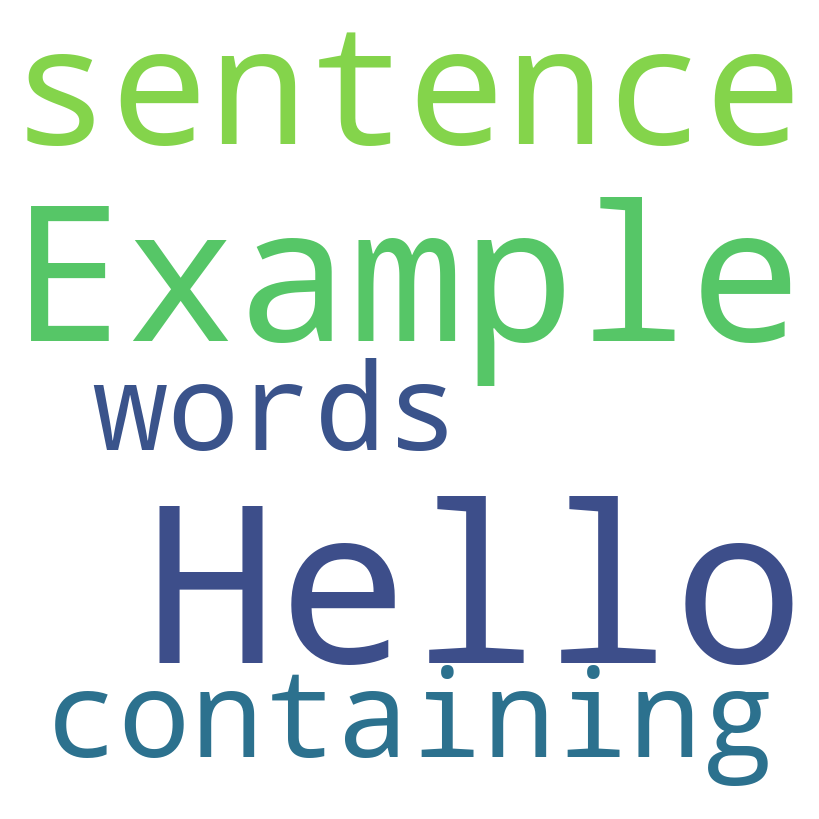

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(s)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Bag-of-n-Grams

One drawback of the Bag-of-Words approach oftentimes is the loss of semantic meaning as a text is broken down into singleton words. The ___Bag-of-n-Grams___ technique tries to improve upon this by using word sequences of length _n_, thereby keeping more of the original structure of the document and possibly retaining more useful information.
Due to its nature, there are a lot more n-grams than singleton words in the same text, leading to a bigger and sparser feature space and more expensive computational costs.

In [13]:
# CountVectorizer to create bag-of-words feature vector
vectorizer = CountVectorizer(token_pattern="(?u)\\b\\w+\\b")
bigram_vectorizer = CountVectorizer(ngram_range=(2,2),token_pattern="(?u)\\b\\w+\\b")
trigram_vectorizer = CountVectorizer(ngram_range=(3,3),token_pattern="(?u)\\b\\w+\\b")
# applied to unprocessed text. The argument ([s]) has to be in brackets in this case as it is a single string
# and the function expects some sort of collection.
vectorizer.fit_transform([s])
print(vectorizer.vocabulary_)

bigram_vectorizer.fit_transform([s])
print(bigram_vectorizer.vocabulary_)

trigram_vectorizer.fit_transform([s])
print(trigram_vectorizer.vocabulary_)

# applied to processed text. The argument ([s_clean]) has to be in brackets in this case as it is a single string
# and the function expects some sort of collection.
vectorizer.fit_transform([s_clean])
print(vectorizer.vocabulary_)

bigram_vectorizer.fit_transform([s_clean])
print(bigram_vectorizer.vocabulary_)

trigram_vectorizer.fit_transform([s_clean])
print(trigram_vectorizer.vocabulary_)

{'hello': 4, 'there': 7, 'this': 8, 'is': 5, 'an': 1, 'example': 3, 'sentence': 6, 'containing': 2, '9': 0, 'words': 9}
{'hello there': 4, 'there this': 7, 'this is': 8, 'is an': 5, 'an example': 1, 'example sentence': 3, 'sentence containing': 6, 'containing 9': 2, '9 words': 0}
{'hello there this': 3, 'there this is': 6, 'this is an': 7, 'is an example': 4, 'an example sentence': 0, 'example sentence containing': 2, 'sentence containing 9': 5, 'containing 9 words': 1}
{'hello': 2, 'example': 1, 'sentence': 3, 'containing': 0, 'words': 4}
{'hello example': 2, 'example sentence': 1, 'sentence containing': 3, 'containing words': 0}
{'hello example sentence': 1, 'example sentence containing': 0, 'sentence containing words': 2}


### Exercise

Your task in this exercise is to take this "deepnlp" dataset and use it to perform classification of individual texts. Take a look at the provided data and transform the dataframe in a suitable way, the aim is to correctly predict the values in the "class" column.
Preprocess the texts first, then create the Bag-of-Words that will be used in training and testing of the classification model (logistic regression). Evaluate the score of the model on the test dataset and create a confusion matrix from the results. You should furthermore use this matrix to calculate metrics like precision, recall and accuracy and plot these in a Precision-Recall-Curve.

In [14]:
df = pd.read_csv("deepnlp/Sheet_1.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB
None


,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


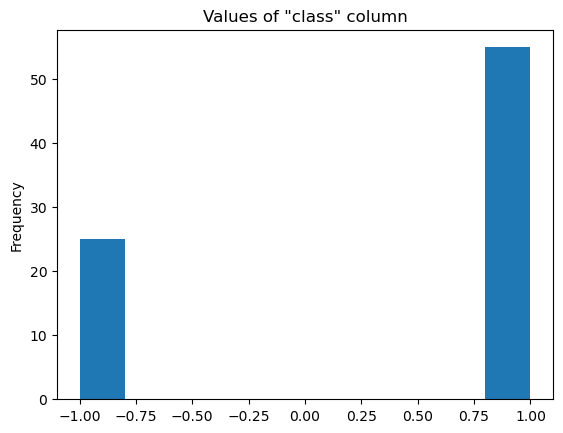

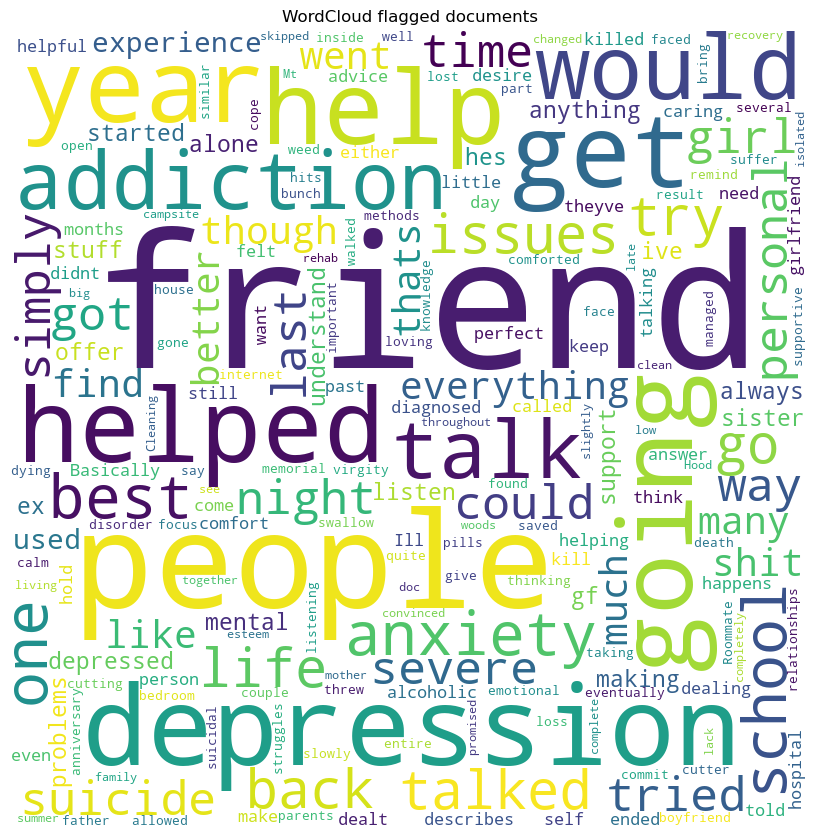

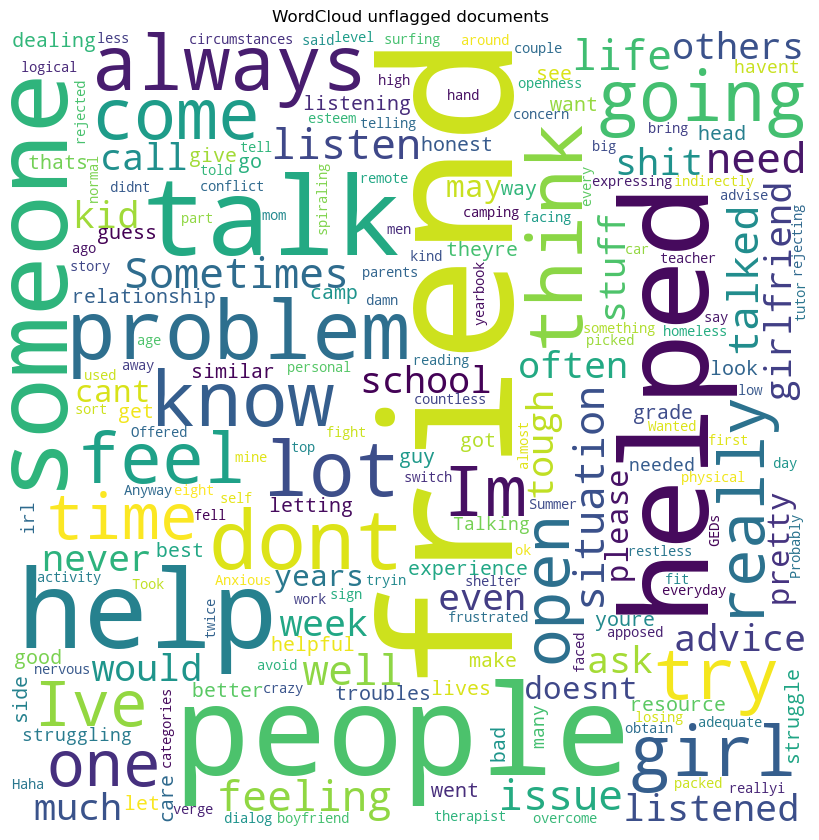

In [15]:
df = df.dropna(subset=["class","response_text"])

df["class"] = df["class"].apply(lambda x: 1 if x=="not_flagged" else -1)
df["class"].plot(kind="hist")
plt.title("Values of \"class\" column")
plt.show()

df["response_text"] = df["response_text"].apply(remove_punctuation)
df["response_text"] = df["response_text"].apply(remove_numbers)

wcloud_f = " ".join(text for i,text in enumerate(df["response_text"]) if df["class"][i] == -1)
wcloud_nf = " ".join(text for i,text in enumerate(df["response_text"]) if df["class"][i] == 1)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(wcloud_f)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("WordCloud flagged documents")
plt.show()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(wcloud_nf)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("WordCloud unflagged documents")
plt.show()

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X1 = df[["response_text"]]
y = df[["class"]]

X1_train, X1_test, y_train, y_test = train_test_split(X1,y,test_size=0.25, random_state=2564)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern="(?u)\\b\\w+\\b")

train_bows1 = vectorizer.fit_transform(X1_train["response_text"])
test_bows1 = vectorizer.transform(X1_test["response_text"])
t1 = vectorizer.get_feature_names_out()

print("len(t1): {}".format(len(t1)))

len(t1): 528


In [18]:
# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
def evaluate_score(model, X_test, y_test): 
    return model.score(X_test, y_test.values.ravel())

def create_and_fit_model(X_train,y_train):
    return linear_model.LogisticRegression().fit(X_train, y_train.values.ravel())

model1 = create_and_fit_model(train_bows1,y_train)
score1 = evaluate_score(model1,test_bows1,y_test)

print("Score without stopwords removed: %0.3f" % score1)

Score without stopwords removed: 0.800


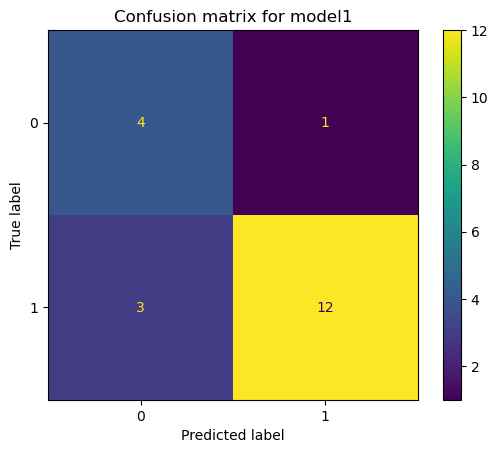

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

preds_model1 = model1.predict(test_bows1)

conf_matrix1 = confusion_matrix(preds_model1, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
disp.plot()
plt.title("Confusion matrix for model1")
plt.show()

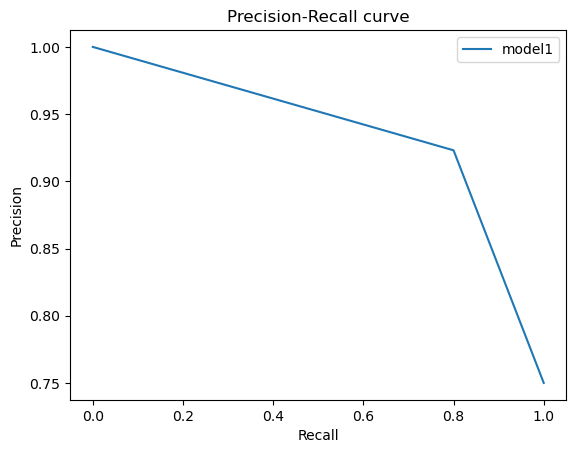

In [20]:
# TN = conf_matrix1[0][0]
# FN = conf_matrix1[1][0]
# TP = conf_matrix1[1][1]
# FP = conf_matrix1[0][1]
def calc_precision(conf_matrix):
    return conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])
    
def calc_recall(conf_matrix):
    return conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])

def calc_accuracy(conf_matrix):
    return (conf_matrix[1][1]+conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])

def calc_metrics(conf_matrix):
    return calc_precision(conf_matrix), calc_recall(conf_matrix), calc_accuracy(conf_matrix)

prec1,rec1,acc1 = calc_metrics(conf_matrix1)

precision, recall, thresholds = precision_recall_curve(preds_model1,y_test)
plt.plot(recall,precision,label="model1")

plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

#### Extension

Now extend your work by applying different transformations, as shown above, as well as different n_grams to the dataset. Your task is to cover all the combinations listed below and find the best option for this classification task. Try to use list comprehensions, functions and loops to automatically generate the results as there are 18 different models to be considered:
<br>

df:
 1. untouched 
     1. 1-gram
     1. 2-gram
     1. 3-gram        
 1. stem
     1. 1-gram
     1. 2-gram
     1. 3-gram
 1. lemma 
     1. 1-gram
     1. 2-gram
     1. 3-gram

df_stopwords:
 1. untouched 
     1. 1-gram
     1. 2-gram
     1. 3-gram        
 1. stem
     1. 1-gram
     1. 2-gram
     1. 3-gram
 1. lemma 
     1. 1-gram
     1. 2-gram
     1. 3-gram
    
<br>
Tips: 

- df.copy()
- x1_train, x1_test, x2_train, x2_test ... = train_test_split(X1,X2,...,Xx,y,test_size=0.25, random_state=2564) (you can individually split an arbitrary amount of input data)                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB
None


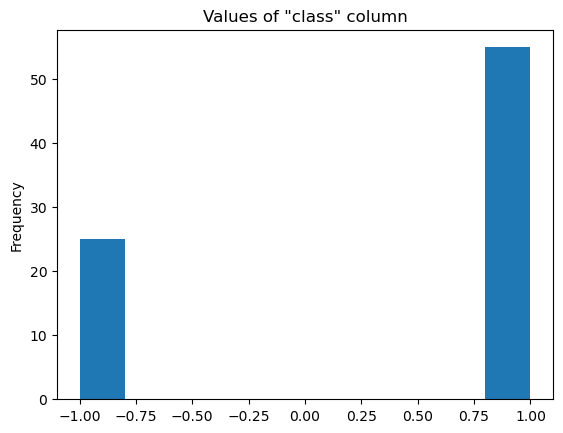

In [21]:
df = pd.read_csv("deepnlp/Sheet_1.csv")
print(df.info())
df.head()

df = df.dropna(subset=["class","response_text"])

df["class"] = df["class"].apply(lambda x: 1 if x=="not_flagged" else -1)
df["class"].plot(kind="hist")
plt.title("Values of \"class\" column")
plt.show()

df["response_text"] = df["response_text"].apply(remove_punctuation)
df["response_text"] = df["response_text"].apply(remove_numbers)

df_stem = df.copy()
df_stem["response_text"] = df_stem["response_text"].apply(stem_words_in_text,stemmer=stemmer)

df_lemma = df.copy()
df_lemma["response_text"] = df_lemma["response_text"].apply(lemmatize_words_in_text,lemmatizer=lemmatizer)

df_stopwords = df.copy()
df_stopwords["response_text"] = df_stopwords["response_text"].apply(remove_stopwords_lower,stopwords=stop_words)

df_stopwords_stem = df_stopwords.copy()
df_stopwords_stem["response_text"] = df_stopwords_stem["response_text"].apply(stem_words_in_text,stemmer=stemmer)

df_stopwords_lemma = df_stopwords.copy()
df_stopwords_lemma["response_text"] = df_stopwords_lemma["response_text"].apply(lemmatize_words_in_text,lemmatizer=lemmatizer)

In [22]:
X1 = df[["response_text"]]
X2 = df_stem[["response_text"]]
X3 = df_lemma[["response_text"]]
X4 = df_stopwords[["response_text"]]
X5 = df_stopwords_stem[["response_text"]]
X6 = df_stopwords_lemma[["response_text"]]

y = df[["class"]]


X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, X4_train, X4_test, X5_train, X5_test, X6_train, X6_test, y_train, y_test = train_test_split(X1,X2,X3,X4,X5,X6,y,test_size=0.25, random_state=2564)

Score for model1: 0.800


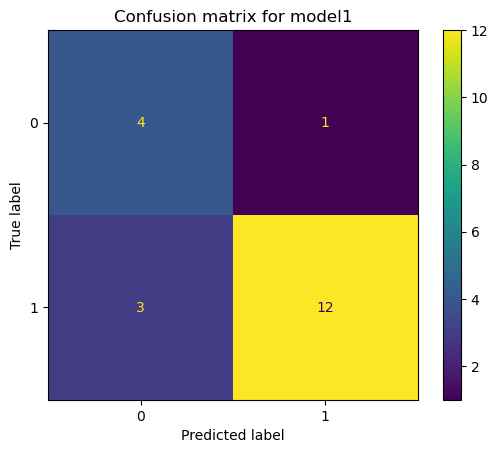

Score for model2: 0.700


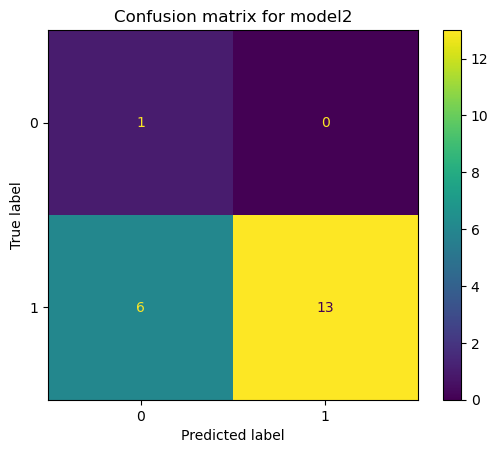

Score for model3: 0.650


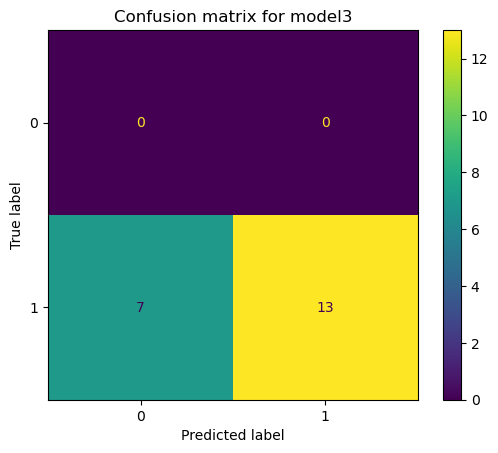

Score for model4: 0.750


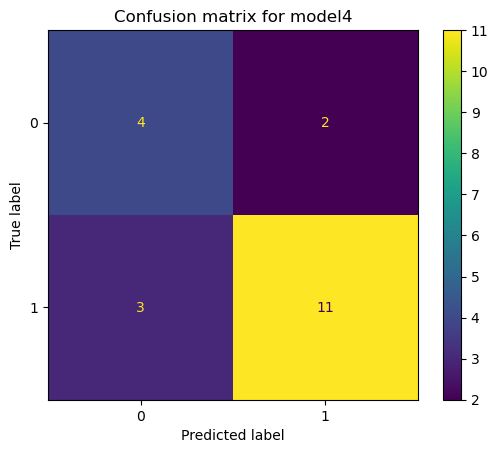

Score for model5: 0.700


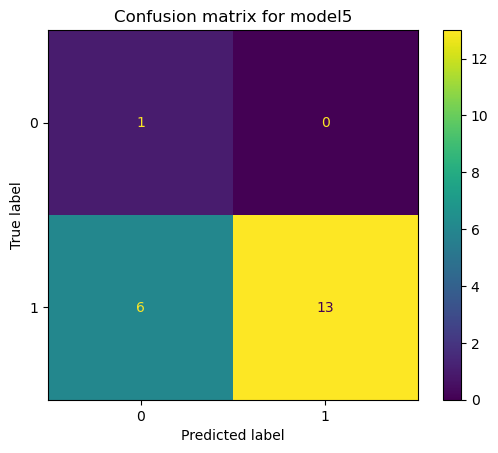

Score for model6: 0.650


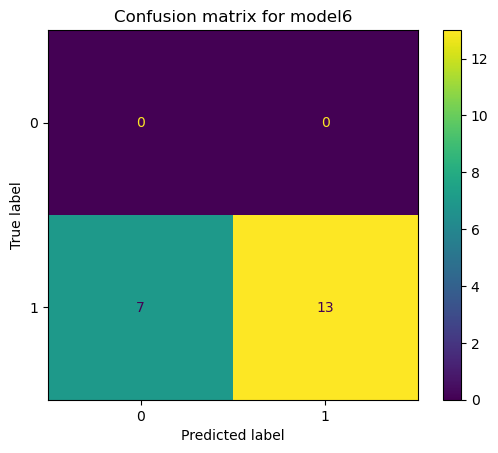

Score for model7: 0.800


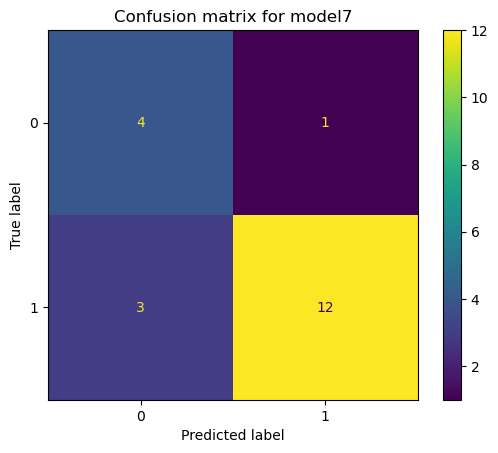

Score for model8: 0.700


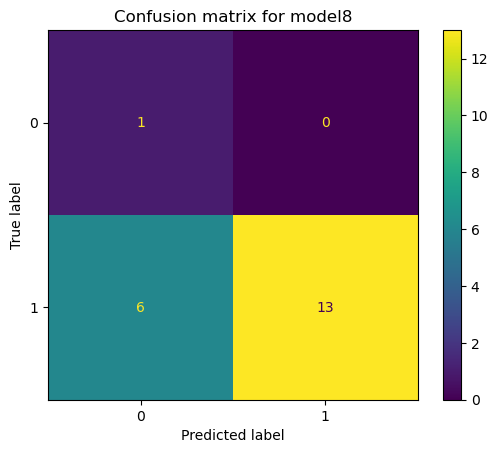

Score for model9: 0.650


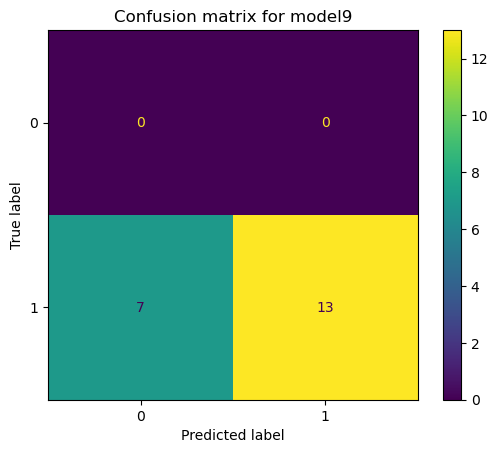

Score for model10: 0.750


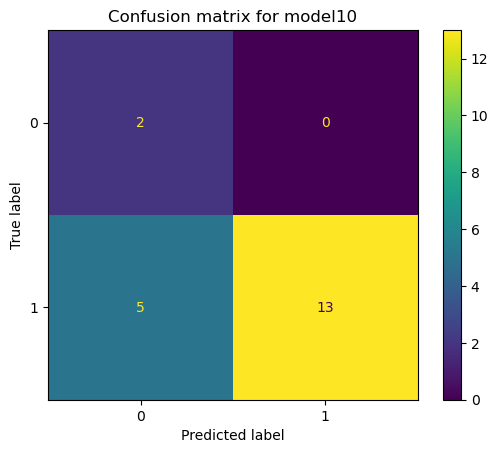

Score for model11: 0.650


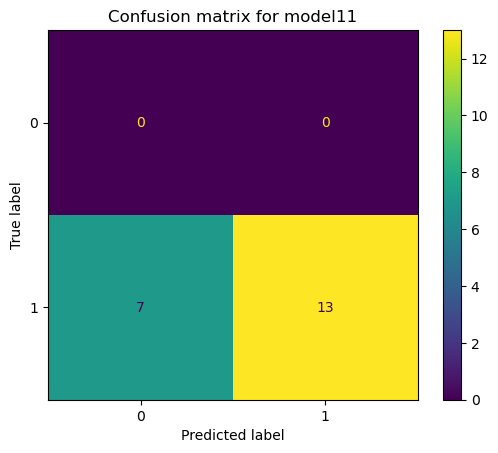

Score for model12: 0.650


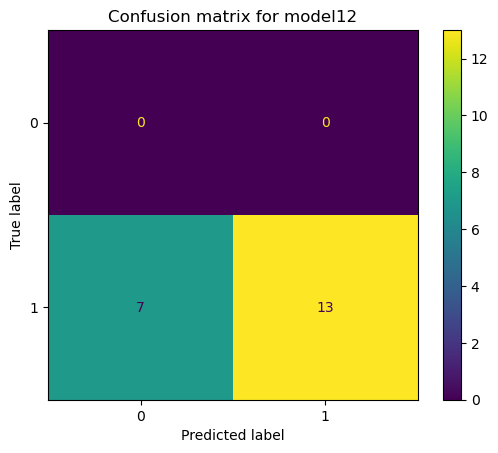

Score for model13: 0.800


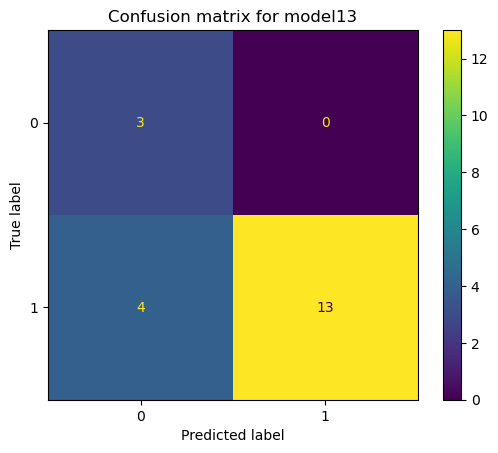

Score for model14: 0.650


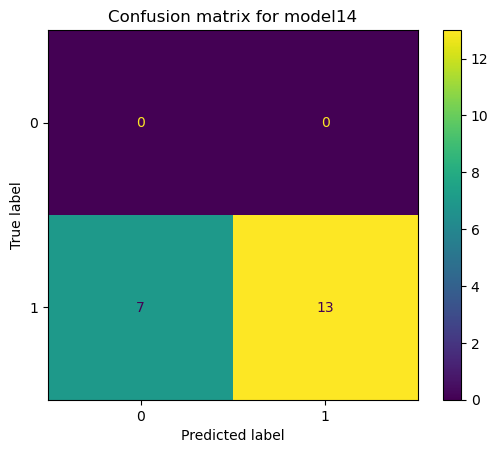

Score for model15: 0.650


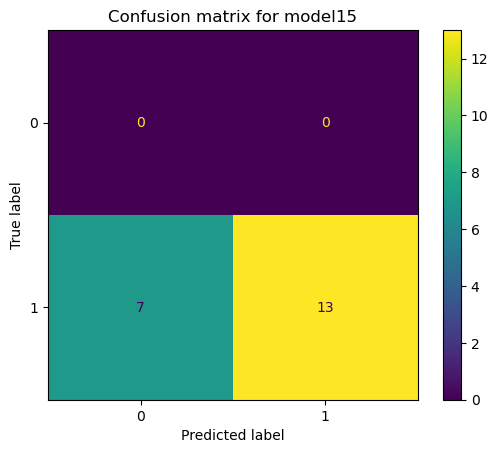

Score for model16: 0.750


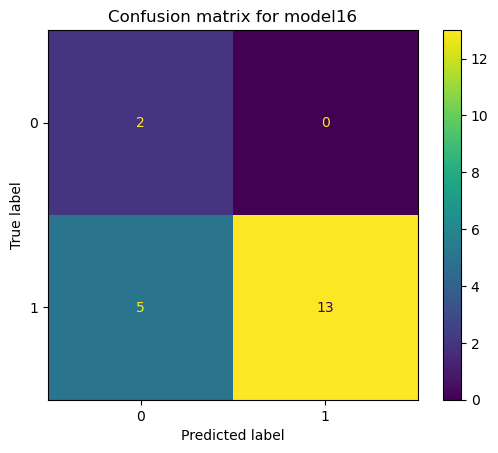

Score for model17: 0.650


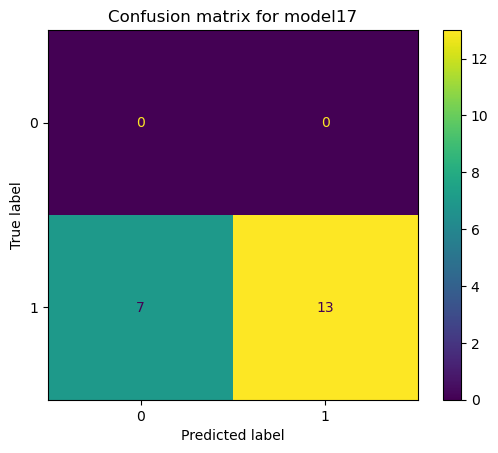

Score for model18: 0.650


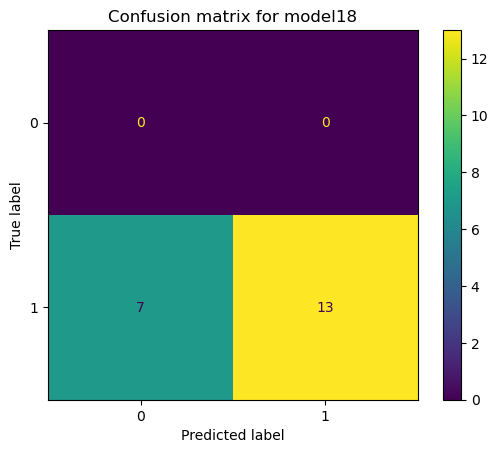

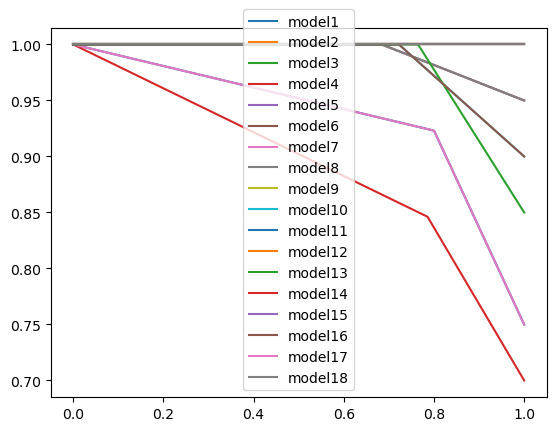

In [23]:
def create_bow(train_df,test_df,column_name,vectorizer):
    return [vectorizer.fit_transform(train_df[column_name]),vectorizer.transform(test_df[column_name])]

all_dfs = [[X1_train,X1_test],[X2_train,X2_test],[X3_train,X3_test],[X4_train,X4_test],[X5_train,X5_test],[X6_train,X6_test]]
all_preds = []  
all_cms = []   # stores all confusion matrizes
all_prcs = []  # stores information for all precision recall curves

vectorizers = [CountVectorizer(token_pattern="(?u)\\b\\w+\\b"),CountVectorizer(ngram_range=(2,2),token_pattern="(?u)\\b\\w+\\b"),CountVectorizer(ngram_range=(3,3),token_pattern="(?u)\\b\\w+\\b")]

all_data = [create_bow(dfs[0],dfs[1],"response_text",vect) for dfs in all_dfs for vect in vectorizers]    
all_models = [create_and_fit_model(data[0],y_train) for data in all_data]
all_scores = [evaluate_score(all_models[i],data[1],y_test) for i,data in enumerate(all_data)]

for i,model in enumerate(all_models):
    print("Score for model{}: {:0.3f}".format(i+1,all_scores[i]))

    preds = model.predict(all_data[i][1])
    all_preds.append(preds)
    
    conf_matrix = confusion_matrix(preds, y_test)
    all_cms.append(conf_matrix)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.title("Confusion matrix for model{}".format(i+1))
    plt.show()
    
    precision, recall, thresholds = precision_recall_curve(preds,y_test)
    all_prcs.append([precision,recall,thresholds])
    
for i,prc in enumerate(all_prcs):
    plt.plot(prc[1],prc[0],label="model{}".format(i+1))
plt.legend()
plt.show()